In [1]:
from qiskit import *
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_state_city
%matplotlib inline 

This code builds of the GHZ jupiter notebook as we take a dive into quantum circuit simulations    
using Qiskit Aer.  

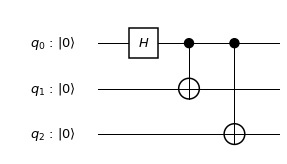

In [2]:
# create a quantum register of 3 qubits:
q = QuantumRegister(3,'q')

# initialize the quantum circuit:
qcirc = QuantumCircuit(q)

qcirc.h(q[0]) # apply the Hadamard gate (H-gate) to q[0], this puts the qubit into super position
qcirc.cx(q[0],q[1]) # (Bell state) apply the pauli-x (cNOT gate) to q0 (contol) and q1 (target)
qcirc.cx(q[0],q[2]) # (GHZ state) apply the pauli-x (cNOT gate) to q0 (control) and q2(target)

qcirc.draw(output = 'mpl')

## State vector simulator
[More imformation on Quantum state vectors](https://en.wikipedia.org/wiki/Quantum_state)

In [3]:
# first, get the quantum circuit simulator backend
# (we will be using the state vector simulator)
qc_backend = BasicAer.get_backend('statevector_simulator')

In [4]:
# now we must create the quantum program and execute
job = execute(qcirc, qc_backend)
print(job.status()) # see if the job was successful

JobStatus.DONE


In [5]:
result = job.result() # get the result when job is succcessful
output_state_vector = result.get_statevector(qcirc)
print(output_state_vector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [6]:
# we could also truncate the results by decimal figures 
# by default AER will show 8 decimal places
output_state_vector = result.get_statevector(qcirc, decimals = 3)
print(output_state_vector)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


Now that we've simulated the quantum circuit, Qiskit also provides some visualization tools to beter view the results using:
qiskit.visualization tools. 

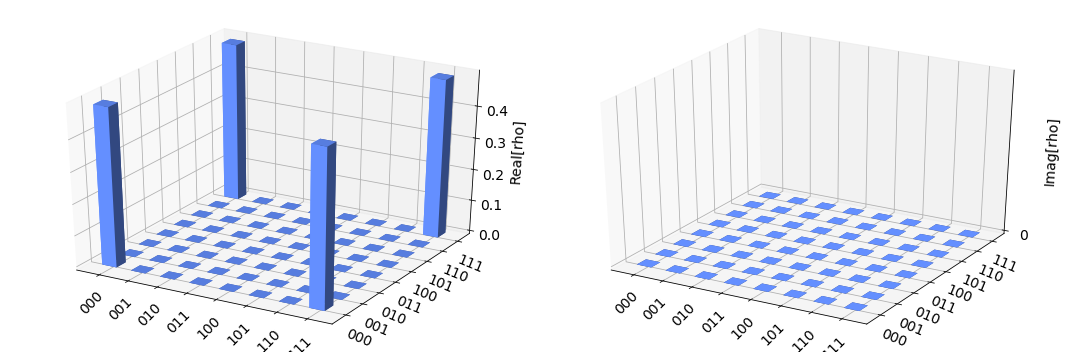

In [7]:
plot_state_city(output_state_vector)

## Unitary Simulator
[More imponformation about unitary transformation](https://www.quantiki.org/wiki/basic-concepts-quantum-computation). Read a few paragraphs down. It shows the unitary form of GHZ state later on.

In [8]:
qc_backend = BasicAer.get_backend('unitary_simulator')
job = execute(qcirc, qc_backend) # create quantum program and execute
print(job.status()) # check the execution status

JobStatus.DONE


In [9]:
result = job.result()
unitary_output = result.get_unitary(qcirc, decimals = 3)
print(unitary_output)

[[ 0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707+0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


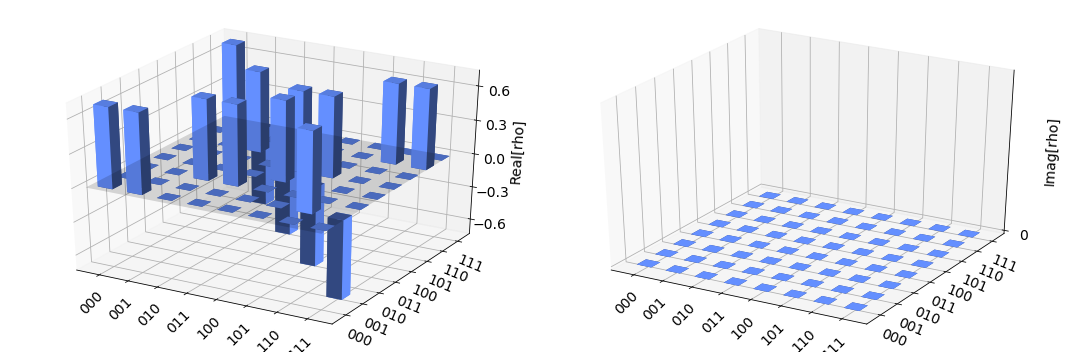

In [10]:
plot_state_city(unitary_output) # not a very useful visualization

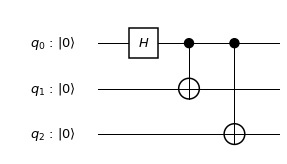

In [11]:
from qiskit.tools.visualization import circuit_drawer
qcirc.draw(output = 'mpl')